In [1]:
ls

Untitled.ipynb           key_labels                      run-traing.py*
Untitled1.ipynb          keywording_test_images_labels/  synset-V16
Visualizepandas.ipynb    lmdb.proto*                     synset-V16_training
__init__.py*             lmdb_parser.py*                 templates/
__init__.pyc             lmdb_parser.pyc                 test.py*
caffe_utils.py*          lmdb_pb2.py*                    test.pyc
caption.proto*           lmdb_pb2.pyc                    test_captions.py*
configs/                 lmdb_writer.py*                 test_captions.pyc
convert.py*              loss_functions.py*              test_table
demo/                    loss_functions.pyc              test_table.csv
evaluation.py            optimizers.py*                  train.py*
evaluation.pyc           predictions                     train.pyc
helpers.py*              result_Area_PR                  train_captions.py*
helpers.pyc              result_auc                      train_captions.pyc
interme

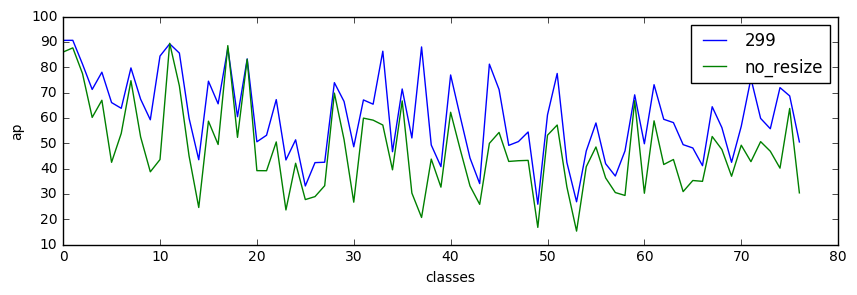

In [1]:
#Plot the mAP,recAt70 and recAt90 across patch sizes
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

patch_sizes=['299','random']
panda_tables=dict()
rare_classes=False
dir_path = os.getcwd()+'/results/'
ext='.csv'


#Evalualate effect of metric across patch_sizes at given value of beta
plt.figure(figsize=(10,10))
beta=str(0.0)          
metrics=['ap']
for ind in range(len(metrics)):
    plotno=ind+1
    last_N_no_of_classes=77

    for i,patch_size in enumerate(patch_sizes):
        filename= ('v16_%s_%s%s')%(patch_size,patch_size,ext)
        panda_tables[patch_size]=pd.read_csv(dir_path+filename,index_col=0)
        values=panda_tables[patch_size][beta+'_'+metrics[ind]].get_values()

        
        plt.subplot(3,1,plotno)
        if patch_size=='random':
            plt.plot(values[0:last_N_no_of_classes],label='no_resize')
        else:
            plt.plot(values[0:last_N_no_of_classes],label=patch_size)
        if metrics[ind] !='ap':
            plt.yscale('log')
            
        plt.xlabel('classes')
        plt.ylabel(metrics[ind])
        plt.xlabel('classes')
        plt.ylabel(metrics[ind])
plt.legend()
plt.savefig('plot_patchSize',ext='png')
plt.show()  
#plt.savefig('plot_patchSize',ext='png')






In [3]:
import pandas as pd
import os 

patch_size=779

dir_path = os.getcwd()+'/results/'
ext='.csv'
filename= ('v16_%s_%s%s')%(patch_size,patch_size,ext)
df=pd.read_csv(dir_path+filename,index_col=0)



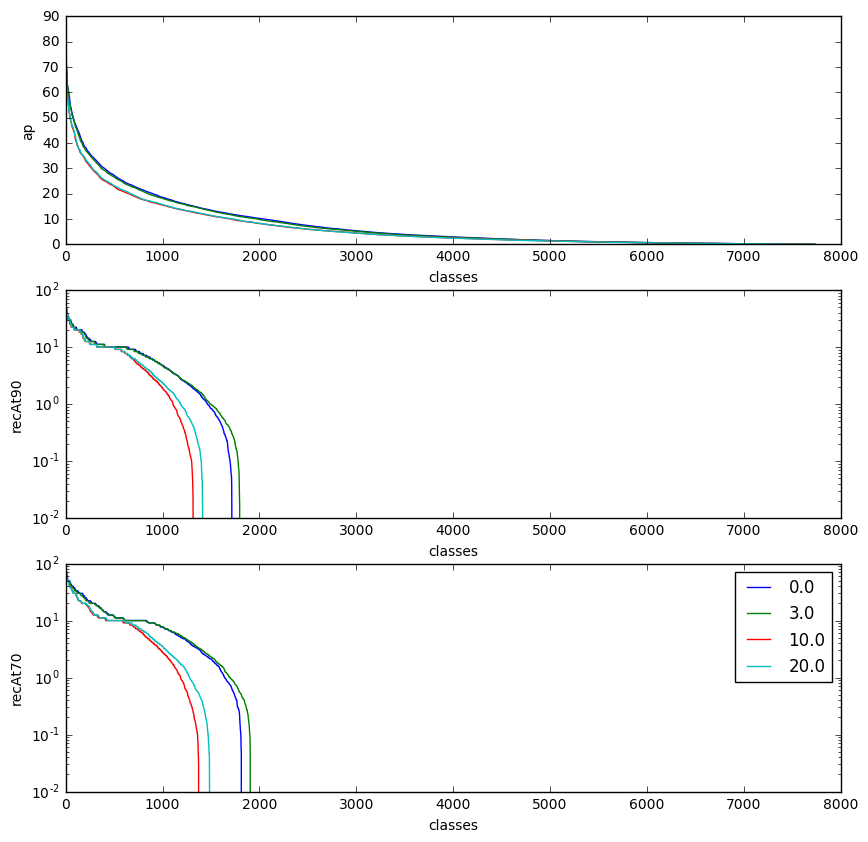

In [5]:
#Plot the mAP,recAt70 and recAt90 across patch sizes
import matplotlib.pyplot as plt
import numpy as np
patch_size=1099
panda_tables=dict()
rare_classes=False
dir_path = os.getcwd()+'/results/'
ext='.csv'


#Evalualate effect of metric across patch_sizes at given value of beta
betas=[0.0,0.1,0.3,0.9,1.5,3.0,10.0,20.0]
betas=[0.0,3.0,10.0,20.0]
metrics=['ap','recAt90','recAt70']
plt.figure(figsize=(10,10))
for ind in range(len(metrics)):
    
    last_N_no_of_classes=7735
    
    plotno=ind+1
    for beta_ in betas:
        beta=str(beta_)
        filename= ('v16_%s_%s%s')%(patch_size,patch_size,ext)
        panda_tables[patch_size]=pd.read_csv(dir_path+filename,index_col=0)
        values=panda_tables[patch_size][beta+'_'+metrics[ind]].get_values()
        values=np.sort(values)[::-1] 
        #print ind
        plt.subplot(3,1,plotno)
        plt.plot(values[len(values)-last_N_no_of_classes:],label=beta)
        if metrics[ind] !='ap':
            plt.yscale('log')
        plt.xlabel('classes')
        plt.ylabel(metrics[ind])
plt.legend()
plt.savefig('plot_beta',ext='png')
plt.show() 

KeyError: '0.0_ap'

['fig' 'bra' 'architectural design' 'houseplant' 'canoe' 'connection block'
 'tramp' 'bankruptcy' 'hostage' 'responsible business' 'shark'
 'fruit salad' 'guangdong province' 'mini dress' 'digital clock'
 'massage table' 'pitcher - jug' 'virginia beach' 'velvet'
 'industrial ship' 'durability' 'chinese lantern festival' 'bale'
 'vehicle hood' 'yellow taxi' 'sprinkles' 'bottle opener' 'brazilian flag'
 'police car' 'information symbol' 'soccer goal' 'shibuya ward'
 'strawberry jam' 'postage stamp' 'nail file' 'convention center'
 'masai mara national reserve' 'high street' 'cruise' 'diaper' 'peak'
 'double bass' 'pinwheel toy' 'gingerbread man' 'tiptoe' 'edmonton'
 'crocodile' 'terracotta' 'leash' 'corn - crop']


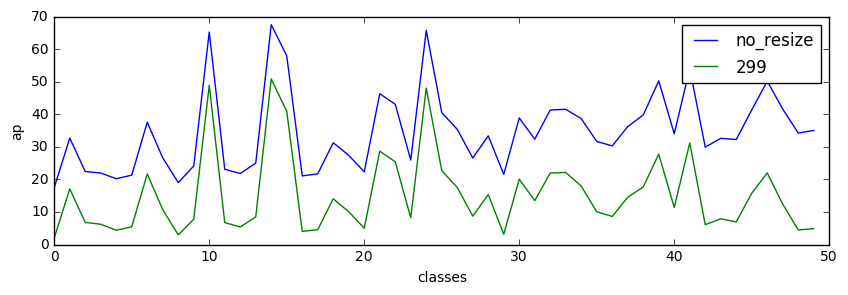

In [11]:
#find classes where defference in AP is maximum
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

patch_sizes=['random','299']
panda_tables=dict()
rare_classes=False
dir_path = os.getcwd()+'/results/'
ext='.csv'


#Evalualate effect of metric across patch_sizes at given value of beta
plt.figure(figsize=(10,10))
beta=str(0.0)          
metrics=['ap']
val=dict()
for ind in range(len(metrics)):
    plotno=ind+1
    last_N_no_of_classes=7735
    
    
    for i,patch_size in enumerate(patch_sizes):
        filename= ('v16_%s_%s%s')%(patch_size,patch_size,ext)
        panda_tables[patch_size]=pd.read_csv(dir_path+filename,index_col=0)
        val[i]=panda_tables[patch_size][beta+'_'+metrics[ind]].get_values()
    
    ind_diff=np.argsort(val[0]-val[1])[-50:]
    print classes[ind_diff]

    for i,patch_size in enumerate(patch_sizes):
        filename= ('v16_%s_%s%s')%(patch_size,patch_size,ext)
        panda_tables[patch_size]=pd.read_csv(dir_path+filename,index_col=0)
        values=panda_tables[patch_size][beta+'_'+metrics[ind]].get_values()
        values=values[ind_diff]
        
        plt.subplot(3,1,plotno)
        if patch_size=='random':
            plt.plot(values[0:last_N_no_of_classes],label='no_resize')
        else:
            plt.plot(values[0:last_N_no_of_classes],label=patch_size)
        if metrics[ind] !='ap':
            plt.yscale('log')
            
        plt.xlabel('classes')
        plt.ylabel(metrics[ind])
        plt.xlabel('classes')
        plt.ylabel(metrics[ind])
plt.legend()
plt.savefig('plot_patchSize',ext='png')
plt.show()  
#plt.savefig('plot_patchSize',ext='png')

In [7]:
df=panda_tables['random']
classes=df.index.values

In [55]:
df

array(['no people', 'outdoors', 'day', ..., 'fitness', 'globe', 'low angle'], dtype=object)